#Họ và Tên: Lâm Quang Phú
#MSSV: 21094601

$$P(X|C_1) = \frac{1}{\sqrt{2\pi}\sigma_1}e^{-\frac{(x-\mu_1)^2}{2\sigma_1^2}}$$

#Thư viện

In [ ]:
import pandas as pd
import numpy as np


#1- Đọc dữ liệu

In [ ]:
map = {}
def label_encoding(x):
    return map[x]


def read_data(file_name):
    data = {}
    df = pd.read_excel(file_name)
    df = df.drop(columns = ["Day"])

    for col_name in df.columns:
        for id, val in enumerate(df[col_name].unique()):
            map[val] = id
        df[col_name] = df[col_name].apply(lambda x: label_encoding(x))
    return df

In [ ]:
df = read_data("play_golf.xlsx")
df

,Outlook,Humidity,Wind,PlayTennis
0,0,0,0,0
1,0,0,1,0
2,1,0,0,1
3,2,0,0,1
4,2,1,0,1
5,2,1,1,0
6,1,1,1,1
7,0,0,0,0
8,0,1,0,1
9,2,1,0,1


#2- Tính mean

In [ ]:
def mean(x):
    return sum(x)/len(x)

In [ ]:
mean(df["Wind"])

0.42857142857142855

#3- Tính Standard deviation

In [ ]:
def standard(x):
    mean_sample = mean(x)
    sum_of_squares = sum((x - mean_sample) ** 2 for x in x)
    sample_variance = sum_of_squares / (len(x) - 1)
    sample_std_dev = sample_variance ** 0.5
    return sample_std_dev

In [ ]:
standard(df["Wind"])

0.5135525910130955

#4- Tính xác suất

In [ ]:
def normal_dist(x , mean_ , sd):
      prob_density = (1/sd*np.sqrt(2*np.pi)) * np.exp(-0.5*((x-mean_)/sd)**2)
      return prob_density

In [ ]:
sd = standard(df["Wind"])
mean_ = mean(df["Wind"])
prob = normal_dist(df["Wind"], mean_, sd)
prob

0     3.445700
1     2.628186
2     3.445700
3     3.445700
4     3.445700
5     2.628186
6     2.628186
7     3.445700
8     3.445700
9     3.445700
10    2.628186
11    2.628186
12    3.445700
13    2.628186
Name: Wind, dtype: float64

#5- Phân lớp


In [ ]:
def Classification(outlook, humidity, wind, df = df):
    # outlook = map[outlook]
    # humidity = map[humidity]
    # wind = map[wind]
    prob_geral = 0.5

    group_0 = df[df["PlayTennis"]==0]
    mean_outlook0 = mean(group_0["Outlook "])
    mean_humidity0 = mean(group_0["Humidity"])
    mean_wind0 = mean(group_0["Wind"])

    standard_outlook0 = standard(group_0["Outlook "])
    standard_humidity0 = standard(group_0["Humidity"])
    standard_wind0 = standard(group_0["Wind"])


    group_1 = df[df["PlayTennis"]==1]
    mean_outlook1 = mean(group_1["Outlook "])
    mean_humidity1 = mean(group_1["Humidity"])
    mean_wind1 = mean(group_1["Wind"])


    standard_outlook1 = standard(group_1["Outlook "])
    standard_humidity1 = standard(group_1["Humidity"])
    standard_wind1 = standard(group_1["Wind"])

    prob_outlook0 = normal_dist(outlook, mean_outlook0, standard_outlook0)
    prob_outlook1 = normal_dist(outlook, mean_outlook1, standard_outlook1)

    prob_humidity0 = normal_dist(humidity, mean_humidity0, standard_humidity0)
    prob_humidity1 = normal_dist(humidity, mean_humidity1, standard_humidity1)

    prob_wind0 = normal_dist(wind, mean_wind0, standard_wind0)
    prob_wind1 = normal_dist(wind, mean_wind1, standard_wind1)

    prob_group0 =  prob_geral*prob_outlook0*prob_humidity0*prob_wind0
    prob_group1 =  prob_geral*prob_outlook1*prob_humidity1*prob_wind1

    if prob_group0 > prob_group1:
        return 0
    else:
        return 1

In [ ]:
# df.columns
sunny = map["Sunny"]
high = map["High"]
weak = map["Weak"]
Classification(sunny, high, weak, df)

0

#6- Tính độ chính xác


In [ ]:
def predict(df):
    predict =[]
    for row in df.values:
        predict.append(( Classification(row[0], row[1], row[2]) == row[3]))
    return predict




In [ ]:
def accuracy(predict):
  return (sum(predict)/ len(predict)*100)

#7- Áp dụng giải thuật này cho bộ dữ liệu sau:

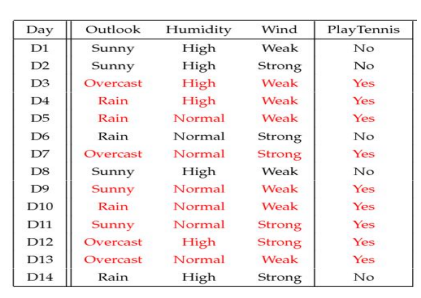

In [ ]:
df = read_data("play_golf.xlsx")
pre = predict(df)
print(f"Accuracy: {accuracy(pre)}")

Accuracy: 71.42857142857143
